## Programming for Data Analysis Project Notebook 2020 - Killian Foley
### Problem Statement
As a manufacturing engineer at electric motor manufacturing company "Bratwurst Motors" I have been assigned the task of performing a tolerance stackup analysis, on a linear assembly of multiple parts using the Monte Carlo simulation method. The use of tolerancing is very important in the mechanical design process because it effects product quality and manufacturing cost. [1] From Wikipedia [2] Tolerance analysis is described as "the general term given to describe the study of accumulated variation in mechanical parts and assemblies". Tolerance stackup is a process used in mechanical engineering for calculating the effects of the accumulated variation that is allowed by specified dimensions and tolerances provided on manufacturing drawings. Monte Carlo simulation is a computational simulation that relies on repeated random sampling according to a probability distribution to obtain numerical results. [3] 

<br>

The below assembly drawing shows the example application. In order for the stator and bearing assembly (motor shaft) to fit inside the frame a clearance must be present. That is, the frame is slightly wider than the bearings and stator. The variables will be explained in more detail below.

#### Assembly Drawing
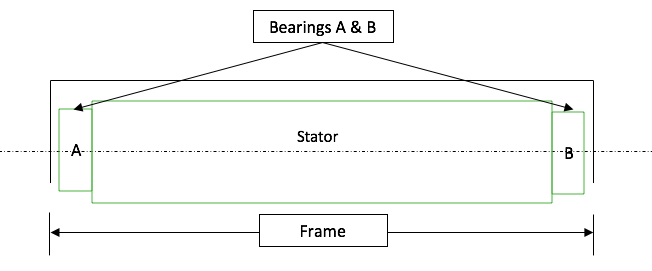

#### Variables Explained
Bearing A = width (mm) Procured parts with dimensions including tolerances provided by the manufacturer. [4]  
Stator = length (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards (IT15) [5]  
Bearing B = width (mm) Same as bearing A above  
Frame = width (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards (IT14) [5]  
Clearance Gap = A gap must be present between the frame and the outer bearigns so the motor shaft can fit.  
<br>
In order to create a dataset to perform the analysis the 4 variables (Bearings A&B, Stator and Frame) will have 200 data points simulated according to a normal distribution with the upper and lower tolerance limits being equal to +3$\sigma$ and -3$\sigma$ respectively.  
The gap will then be calculated for each assembly according to the formula  
Clearance Gap(mm) = Frame(mm) - (Bearing A(mm) + Stator(mm) + Bearing B(mm))
From this result we can investigate how many, if any will result in no clearnace gap.

#### Simulating the Random Variables
First the relevant Python packages are imported - Numpy, Pandas, Matplotlib.pyplot, Seaborn. Numpy.random will be used to generate the data. The number of datapoints simulated for each variable will be 200. In order to ensure reproducible data a generator seed is set in Numpy.random.
<br>
As outlined above each of the variables will be simulated according to a normal (Gaussian) distribution. The nominal dimensions and tolerances are as follows
Bearings = 15mm + 0/- 0.120mm  
Stator = 180mm +/- 1.6mm  
Frame = 211 +/- 1.15mm  

In [1]:
#start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set Numpy precision to 3 decimal places due to practical measurement accuracies
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

#setting the random generator so results can be reproduced

from numpy.random import default_rng
rg = default_rng(135792468)

#Generate bearing A data using normal distribution
bearing_mu, bearing_sigma = 14.96, 0.02 # assign bearing mean and standard deviation
bearing_width_A = rg.normal(bearing_mu, bearing_sigma, 200) #np.random.normal simulates 200 data points
bearing_width_A

array([14.936, 14.981, 14.945, 14.971, 14.943, 14.967, 14.985, 14.996,
       14.96 , 14.945, 14.962, 14.977, 14.987, 14.99 , 14.949, 14.94 ,
       14.933, 14.996, 14.968, 14.93 , 14.94 , 14.961, 14.986, 14.961,
       14.977, 14.937, 14.95 , 14.977, 14.941, 14.959, 14.962, 14.987,
       14.983, 14.97 , 14.945, 14.976, 14.964, 14.948, 14.988, 14.958,
       14.964, 14.974, 14.984, 14.986, 14.964, 14.959, 14.978, 14.952,
       14.948, 14.922, 14.937, 14.965, 14.977, 14.959, 14.992, 14.949,
       14.962, 14.946, 14.944, 15.014, 14.96 , 14.974, 14.941, 14.952,
       14.93 , 14.927, 14.996, 14.974, 14.975, 14.98 , 14.946, 14.986,
       14.961, 14.936, 14.951, 14.939, 14.961, 14.952, 14.921, 14.959,
       14.964, 14.953, 14.993, 14.921, 14.963, 14.986, 14.983, 14.938,
       14.943, 14.947, 14.939, 14.984, 14.991, 14.903, 14.932, 14.947,
       14.948, 14.924, 14.918, 14.971, 14.967, 14.967, 14.946, 14.988,
       14.94 , 14.929, 14.956, 14.968, 14.942, 14.936, 14.933, 14.984,
      

In [2]:
#Generating bearing B data using normal distribution
#Use same bearing mu and sigma from bearing A
bearing_width_B = rg.normal(bearing_mu, bearing_sigma, 200) #simulate bearing B width using normal distribution
bearing_width_B

array([14.978, 14.998, 14.914, 14.95 , 14.937, 14.956, 14.949, 14.958,
       15.003, 14.96 , 14.964, 14.978, 14.956, 14.956, 14.966, 14.952,
       14.979, 14.945, 14.95 , 14.954, 14.957, 14.947, 14.968, 14.966,
       14.973, 14.998, 14.986, 14.953, 14.946, 14.971, 14.978, 14.948,
       14.998, 14.962, 14.962, 14.983, 14.996, 14.971, 14.988, 14.972,
       14.95 , 14.988, 14.95 , 14.942, 14.963, 14.977, 14.961, 14.965,
       14.961, 14.921, 14.966, 14.983, 14.985, 14.976, 14.972, 14.931,
       14.978, 14.962, 14.984, 14.954, 14.952, 14.938, 14.933, 14.946,
       14.971, 14.959, 14.983, 14.964, 14.937, 14.973, 14.975, 14.983,
       14.948, 14.96 , 14.968, 14.965, 14.951, 14.971, 14.959, 14.938,
       14.983, 14.962, 14.96 , 14.981, 14.977, 14.964, 14.97 , 14.981,
       14.958, 14.972, 14.955, 14.955, 14.943, 14.971, 14.961, 14.933,
       14.963, 14.964, 14.95 , 14.927, 14.969, 14.968, 14.951, 14.982,
       14.972, 14.986, 14.931, 14.94 , 14.901, 14.977, 14.954, 14.957,
      

As the manufacturing facilty employs Six Sigma techniques the manufacturing yield will be designed to these parameters. That is, the upper and lower tolerance limits will be +3 and -3 standard deviations ($\sigma$) respectively with the distribution centred around the halfway point ($\mu$).  
https://en.wikipedia.org/wiki/Six_Sigma

In [3]:
stator_mu, stator_sigma = 180.0, 0.533 # assign stator mean and standard deviation
stator_length = rg.normal(stator_mu, stator_sigma, 200) # simulate hole diameter variable using normal distribution
stator_length

array([179.545, 179.383, 180.365, 179.491, 180.239, 180.873, 179.079,
       180.176, 179.575, 179.714, 179.698, 179.43 , 180.529, 180.606,
       179.819, 180.672, 179.951, 179.449, 181.505, 179.428, 180.4  ,
       180.311, 180.281, 179.729, 180.577, 178.952, 180.223, 180.25 ,
       180.945, 180.396, 179.603, 179.437, 179.634, 179.81 , 180.182,
       180.828, 179.844, 180.895, 179.195, 181.148, 180.326, 180.042,
       180.762, 180.056, 179.328, 180.212, 180.396, 179.783, 179.543,
       179.673, 180.105, 180.146, 180.483, 179.795, 180.354, 179.914,
       180.798, 179.226, 179.531, 180.196, 180.275, 180.721, 180.347,
       179.667, 180.538, 179.284, 180.072, 179.491, 179.655, 179.94 ,
       180.359, 180.23 , 180.068, 179.962, 179.452, 179.525, 179.603,
       179.85 , 180.73 , 179.634, 180.233, 180.392, 180.255, 180.138,
       180.77 , 179.61 , 179.496, 180.443, 180.419, 180.272, 179.477,
       179.967, 179.045, 179.629, 180.116, 180.366, 179.838, 180.055,
       180.667, 179.

In [4]:
frame_mu, frame_sigma = 211.0, 0.383 # assign frame mean and standard deviation
frame_width = rg.normal(frame_mu, frame_sigma, 200) # simulate hole diameter variable using normal distribution
frame_width

array([210.042, 211.032, 211.327, 210.584, 211.435, 211.057, 211.42 ,
       210.694, 211.263, 211.449, 211.912, 210.69 , 210.725, 211.026,
       211.043, 211.294, 210.773, 211.657, 211.102, 211.169, 211.042,
       210.885, 210.979, 211.484, 210.049, 210.892, 210.932, 211.267,
       210.931, 210.935, 211.068, 210.713, 210.924, 211.337, 210.503,
       210.841, 210.171, 210.704, 211.292, 210.478, 210.87 , 211.2  ,
       210.209, 211.322, 211.227, 211.543, 212.258, 211.254, 211.066,
       210.895, 211.047, 211.147, 211.357, 211.288, 211.259, 211.356,
       210.82 , 210.86 , 210.921, 211.608, 211.115, 211.25 , 210.781,
       211.023, 211.315, 210.939, 210.537, 211.243, 211.241, 211.324,
       211.412, 210.715, 211.335, 211.299, 211.094, 211.497, 210.826,
       211.022, 211.051, 210.903, 211.655, 210.13 , 211.551, 211.106,
       210.343, 210.785, 210.659, 211.066, 210.971, 211.849, 210.988,
       210.876, 210.638, 210.963, 210.553, 211.207, 211.318, 211.234,
       211.822, 211.

Now that all the random data has been simulated the relating gap clearances can be calculated using the formula  
Clearance Gap(mm) = Frame(mm) - (Bearing A(mm) + Stator(mm) + Bearing B(mm)).  
Numpy will create a np.array with the 200 results

In [5]:
#calculate the clearance gap for each combination of assembly parts
clearance_gap = frame_width - (bearing_width_A + stator_length + bearing_width_B)
clearance_gap

array([ 0.584,  1.67 ,  1.104,  1.172,  1.316,  0.26 ,  2.408,  0.563,
        1.725,  1.83 ,  2.287,  1.306,  0.254,  0.474,  1.309,  0.73 ,
        0.91 ,  2.267, -0.322,  1.856,  0.745,  0.666,  0.745,  1.828,
       -0.478,  2.006,  0.774,  1.088,  0.099,  0.608,  1.526,  1.341,
        1.309,  1.594,  0.413,  0.054,  0.367, -0.11 ,  2.121, -0.6  ,
        0.63 ,  1.196, -0.487,  1.338,  1.972,  1.395,  1.923,  1.554,
        1.614,  1.381,  1.04 ,  1.053,  0.912,  1.559,  0.941,  1.561,
        0.082,  1.727,  1.461,  1.443,  0.928,  0.617,  0.56 ,  1.457,
        0.877,  1.769,  0.486,  1.814,  1.674,  1.431,  1.132,  0.517,
        1.359,  1.441,  1.723,  2.068,  1.311,  1.248,  0.442,  1.372,
        1.475, -0.176,  1.344,  1.066, -0.367,  1.226,  1.21 ,  0.705,
        0.649,  1.658,  1.617,  0.97 ,  1.659,  1.46 ,  0.544,  0.961,
        1.569,  1.291,  1.288,  1.338,  0.305,  0.82 ,  0.114,  1.13 ,
        0.533,  0.258,  1.615,  2.517,  0.519,  1.012,  1.675,  0.335,
      

### Create a Panadas DataFrame of the variables
[Pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
A Pandas DataFrame can be created from a Dictionary of the NumPy arrays that were created. At this point the columns associated with the variables will be given names.

In [6]:
d = {'BearingA': bearing_width_A, 'StatorLength': stator_length, 'BearingB': bearing_width_B, 'FrameWidth': frame_width, 'Clearance': clearance_gap}
df = pd.DataFrame(data=d)
df

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
0,14.936,179.545,14.978,210.042,0.584
1,14.981,179.383,14.998,211.032,1.670
2,14.945,180.365,14.914,211.327,1.104
3,14.971,179.491,14.950,210.584,1.172
4,14.943,180.239,14.937,211.435,1.316
...,...,...,...,...,...
195,14.978,179.544,14.975,210.295,0.798
196,14.972,179.843,14.962,210.845,1.068
197,14.926,180.051,14.963,211.561,1.622
198,14.964,180.176,14.966,210.950,0.844


In [7]:
df.describe()

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
count,200.000,200.000,200.000,200.000,200.000
mean,14.960,180.011,14.960,211.017,1.086
std,0.021,0.514,0.019,0.404,0.689
min,14.903,178.521,14.901,210.042,-0.600
25%,14.945,179.633,14.949,210.774,0.638
50%,14.960,180.056,14.962,211.024,1.131
75%,14.974,180.361,14.973,211.283,1.482
max,15.014,181.505,15.005,212.258,3.248


In [ ]:
count, bins, ignored = plt.hist(hole_diameter, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#### References
[1] Design Society Publication; pdf in repo <br />
[2] Tolerance Analysis wiki; https://en.wikipedia.org/wiki/Tolerance_analysis <br />
[3] Monte Carlo Method wiki; https://en.wikipedia.org/wiki/Monte_Carlo_method <br />
[4] SKF Bearing Catalogue. Bearing 6304; https://www.skf.com/binaries/pub12/Images/0901d196807026e8-100-700_SKF_bearings_and_mounted_products_2018_tcm_12-314117.pdf <br />
[5] International Tolerance (IT) Grade Table; https://www.engineersedge.com/international_tol.htm <br />

Links
https://www.engineeringtoolbox.com/metric-threads-d_777.html
https://www.engineersedge.com/international_tol.htm
https://www.maford.com/SiteContent/Documents//2018_catalog_sections//MAFord_2018_Master_Catalog_HP_Drill_%20Selection_Chart.pdf